In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
Con la función `make_classification` de scikit-learn, creamos un conjunto de datos para clasificar. Para empezar vamos a contar con sólo un atributo o *feature* y dos clases o categorías. Los categorías van a estar separadas, pero permitiremos un cierto grado de solapamiento a través del parámetro `class_sep`

[[ 0.16558809]
 [-0.62411408]
 [ 0.99467604]
 [-1.40343628]
 [ 0.80023702]
 [-1.18377264]
 [-0.19610046]
 [-0.35490151]
 [-0.46479925]
 [ 0.03870163]
 [ 0.44878302]
 [-1.09263471]
 [-0.18609941]
 [-0.00249061]
 [ 0.72169691]
 [-1.06492508]
 [ 0.21665901]
 [-0.46310126]
 [ 0.3706664 ]
 [ 0.27060197]
 [ 0.12780624]
 [-0.21071026]
 [ 0.65607395]
 [-0.38187916]
 [ 0.65598076]
 [-0.1265208 ]
 [ 0.4385876 ]
 [ 0.30942911]
 [ 0.52747478]
 [-0.13655417]
 [ 0.54806773]
 [-0.43661242]
 [ 0.80148213]
 [-0.88313558]
 [-0.02805607]
 [-0.24666714]
 [ 0.04533666]
 [ 0.29136609]
 [-0.528505  ]
 [ 0.11444509]
 [ 0.03729187]
 [ 0.14653091]
 [-0.43808621]
 [ 0.0928973 ]
 [-0.32122462]
 [-0.31642107]
 [-0.92538677]
 [-0.82924037]
 [-0.43632551]
 [ 0.05205052]
 [-0.36611696]
 [ 0.40498796]
 [ 0.10296635]
 [-0.54458002]
 [ 0.70757728]
 [-1.03242287]
 [ 1.123584  ]
 [-0.75079668]
 [ 0.60622057]
 [ 0.51851616]
 [ 0.7067352 ]
 [ 0.19317275]
 [ 0.72654265]
 [-0.68719044]
 [ 0.13242262]
 [-0.13158181]
 [ 0.86591

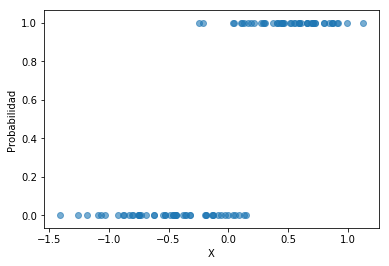

In [2]:
x, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,class_sep=0.5)
print(x)
print(y)
plt.scatter(x, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('Probabilidad')

Los modelos lineales, también pueden ser utilizados para clasificaciones; es decir, que primero ajustamos el modelo lineal a la probabilidad de que una cierta clase o categoría ocurra y, a luego, utilizamos una función para crear un umbral en el cual especificamos el resultado de una de estas clases o categorías. La función que utiliza este modelo es la función logística.

$$f(x) = \frac{1}{1 + e^{-1}}$$

En regresión logística los que vamos a hacer es calcular las probabilidades $p(C_k|x)$. La función logística o [sigmoide](http://es.wikipedia.org/wiki/Función_sigmoide) nos va a permitir definir esas probabilidades

Como veremos a continuación, la sigmoide tiene forma de *S* y la función logística juega un papel muy importante en muchos algoritmos de clasificación.

Primero definimos el modelo que vamos a emplear que será `LogisticRegression`. Lo cargamos con los parámetros por defecto y lo entrenamos.

In [3]:
modelo = LogisticRegression()
modelo.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Por defecto vemos los parámetros con los que se ha entrenado el modelo. Una vez entrenado podemos predecir las probabilidades de pertenencia a cada categoría. Para ello, como ya hemos dicho, utilizaremos la función `predict_proba()` que toma como datos de entrada los atributos *X*.

En scikit-learn podemos obtener clasificaciones de ambas maneras una vez entrenado el modelo.

+ `modelo.predict()`, para asignar una categoría.
+ `modelo.predict_proba()`, para determinar la probabilidad de pertenencia.

Lo que nos devuelve la función `predict_proba()` es un array de dimensiones (n atributos, n clases)

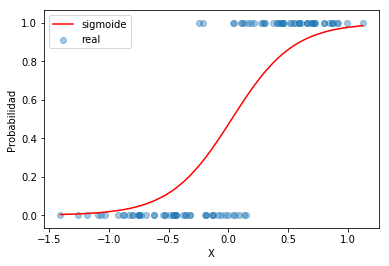

In [4]:
plt.scatter(x, y, alpha=0.4, label='real')
plt.plot(np.sort(x, axis=0), modelo.predict_proba(np.sort(x, axis=0))[:,1], color='r', label='sigmoide')
plt.legend(loc=2)
plt.xlabel('X')
plt.ylabel('Probabilidad')

Se aprecia claramente la curva en forma de *S* de la función logística que es lo que estábamos buscando. Esto nos dice que un punto con $x=0$ tiene aproximadamente un 50 % de probabilidades de pertenecer a cualquiera de las dos categorías.

Si a partir de las probabilidades quisiesemos hacer una clasificación por categorías no tendríamos más que definir un valor umbral. Es decir, cuando la función logística asigna una probabilidad mayor a, por ejemplo, 0.5 entonces asignamos esa categoría. Eso es básicamente lo que hace `predict` tal y como podemos ver a continuación.

In [5]:
#Medimos lo bueno que es nuestro modelo dividiendo datos de entrenamiento y datos de prueba
from sklearn import model_selection, metrics
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %2f" % metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.960000
Precision: 0.961538


Con la función make_classification de scikit-learn, creamos un conjunto de datos para clasificar. En este caso tenemos 4 atributos o features.

In [6]:
x, y = make_classification(n_samples=100, n_features=4)

In [7]:
# Importando el modelo
from sklearn.linear_model import LogisticRegression

# Creando el modelo
modelo = LogisticRegression()

# Dividiendo el dataset en entrenamiento y evaluacion
x_entrenamiento = x[:-20]
x_evaluacion = x[-20:]
y_entrenamiento = y[:-20]
y_evaluacion = y[-20:]

print(x_entrenamiento.shape)
print(x_evaluacion.shape)

#ajustando el modelo
modelo.fit(x_entrenamiento, y_entrenamiento) 

# Realizando las predicciones
y_predic_entrenamiento = modelo.predict(x_entrenamiento) 
y_predic_evaluacion = modelo.predict(x_evaluacion)

(80, 4)
(20, 4)


In [8]:
# Verificando la exactitud del modelo
#Accuracy-->se realiza sobre los datos de entrenamiento
#Precision-->se realiza sobre los datos de evaluacion

print("Accuracy datos entrenamiento: %2f" % metrics.accuracy_score(y_entrenamiento, y_predic_entrenamiento))
print("Precision datos evaluacion: %2f" % metrics.precision_score(y_evaluacion, y_predic_evaluacion, average="macro"))

Accuracy datos entrenamiento: 0.912500
Precision datos evaluacion: 0.950000


In [10]:
# Dividiendo el dataset en entrenamiento y evaluacion
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,train_size=0.8)

print(x_train.shape)
print(x_test.shape)

modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %2f" % metrics.precision_score(y_test, y_pred, average="macro"))

(80, 4)
(20, 4)
Accuracy: 0.950000
Precision: 0.961538


Como podemos ver en este ejemplo también nuestro modelo tiene bastante precisión clasificando las categorías de nuestro dataset.